<a href="https://colab.research.google.com/github/Justin-Polchies/Python-Projects/blob/School-Based-Projects/Assignment_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Importing data analysis packages
import pandas as pd
import numpy as np

# Importing data visualization packages
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(style="whitegrid")

from sklearn.model_selection import cross_validate, cross_val_score

# Importing machine learning packages
from sklearn.linear_model import LogisticRegression

# Miscellaneous
import time
import warnings
warnings.filterwarnings('ignore')
pd.set_option('max_colwidth',80)

In [2]:
df = pd.DataFrame({'x': [10,15,20,25,30], 'y1': [20,35,40,34,20], 'y2':[40,35,25,30,35]})

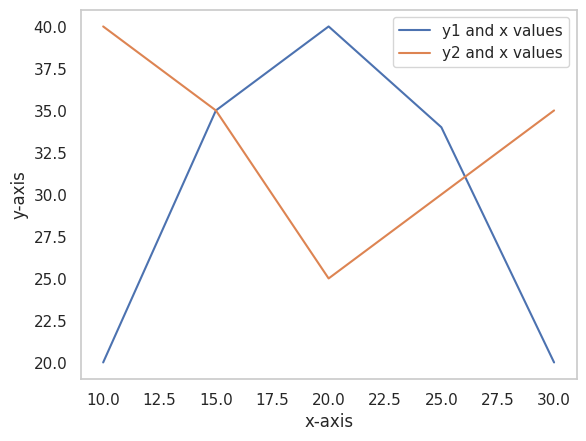

In [3]:
plt.plot(df['x'], df['y1'])
plt.plot(df['x'], df['y2'])
plt.grid(False)
plt.xlabel('x-axis')
plt.ylabel('y-axis')
plt.legend(('y1 and x values','y2 and x values'), loc ='upper right')
plt.show()

In [4]:
df_2 = pd.DataFrame({'Passengerid':[1,2,3,4,5],'Survived':[0,1,1,1,0], 'Pclass':[3,1,3,1,3], 'Name': ['Braund, Mr. Owen Harris','Cumings, Mrs. John Bradley (Florence Briggs)', 'Heikkinen, Miss. Laina', 'Futrelle, Mrs. Jacques Heath (lily May Peel)', 'Allen, Mr. William Henry'],
                  'Sex':['male','female','female','female','male'], 'Age':[22.0, 38.0, 26.0, 35.0, 35.0], 'SibSp':[1, 1, 0 ,1, 0], 'Parch':[0,0,0,0,0],
                  'Ticket':['A/5 21171','PC 17599', 'STON/02.3101282','113803','373450'],'Fare':[7.2500, 71.2833, 7.9250, 53.1000, 8.0500], 'Cabin':['','C58', '', 'C123',''],
                  'Embarked': ['S', 'C', 'Q', 'S', 'S']})

In [5]:
Age = pd.cut(df_2['Age'], [0,18,29,50,100])
table = pd.pivot_table(df_2, index=['Sex',Age], columns='Embarked', values='Survived')
table

Embarked           C    Q    S
Sex    Age                    
female (18, 29]  NaN  1.0  NaN
       (29, 50]  1.0  NaN  1.0
male   (18, 29]  NaN  NaN  0.0
       (29, 50]  NaN  NaN  0.0

In [6]:
wide_data = table.reset_index().pivot(index='Sex', columns='Age')
wide_data

Embarked        C                 Q                 S         
Age      (18, 29] (29, 50] (18, 29] (29, 50] (18, 29] (29, 50]
Sex                                                           
female        NaN      1.0      1.0      NaN      NaN      1.0
male          NaN      NaN      NaN      NaN      0.0      0.0

In [7]:
aveTempNov = pd.DataFrame({'Date': pd.date_range(start = pd.Timestamp('2021-11'), end = pd.Timestamp('2021-11') + pd.offsets.MonthEnd(0),freq='D')})

aveTempNov['Date'] = pd.to_datetime(aveTempNov['Date']).dt.date

In [8]:
#In the part to add new column Hours_of_Sun set the high mark to 11 to include 10.
aveTempNov['Temp']= np.random.randint(25, 72, aveTempNov.shape[0])
aveTempNov['Hours_of_Sun']= np.random.randint(0, 11, aveTempNov.shape[0])
aveTempNov = aveTempNov.set_index('Date')
aveTempNov

,Temp,Hours_of_Sun
Date,,
2021-11-01,29,9
2021-11-02,71,7
2021-11-03,55,5
2021-11-04,48,10
2021-11-05,38,8
2021-11-06,56,3
2021-11-07,28,8
2021-11-08,35,5
2021-11-09,49,8


In [9]:
path2data = "https://raw.githubusercontent.com/cmdlinetips/data/master/combine_year_month_day_into_date_pandas.csv"
df = pd.read_csv(path2data)
df

,year,month,day
0,2012,1,1
1,2012,1,2
2,2012,1,3
3,2012,1,4
4,2012,1,5
...,...,...,...
95,2012,4,5
96,2012,4,6
97,2012,4,7
98,2012,4,8


In [10]:
df['Date'] = pd.to_datetime(df[['year','month','day']])
df

,year,month,day,Date
0,2012,1,1,2012-01-01
1,2012,1,2,2012-01-02
2,2012,1,3,2012-01-03
3,2012,1,4,2012-01-04
4,2012,1,5,2012-01-05
...,...,...,...,...
95,2012,4,5,2012-04-05
96,2012,4,6,2012-04-06
97,2012,4,7,2012-04-07
98,2012,4,8,2012-04-08


In [11]:
class residence:
  furniturelist = [];
  def __init__(self, town, footage, costly):
    self.town = town
    self.footage = footage
    self.costly = costly

  def addItems(self,items):
    residence.furniturelist.append(items)
  
  def residenceInfo(self):
    if(bool(residence.furniturelist)):
      print("This redsidence is a" + self.footage 
            + " square feet. It is in the town " + self.town + " with a monthly cost of " 
            + self.costly + " a month")
    else:
      print("This redsidence is a" + self.footage 
            + " square feet. It is in the town " + self.town + " with a monthly cost of " 
            + self.costly + " a month")
      print(" This residence has the following items for Funiture. ")
      for x in range(len(residence.furniturelist)):
        print(residence.furniturelist[x],)
  def __removeItems(self):
    residence.furniturelist.clear();

In [12]:
import nltk
import urllib
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
nltk.download('omw-1.4')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
from nltk.stem import PorterStemmer
from nltk import LancasterStemmer
from nltk.stem import WordNetLemmatizer
import re, string

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


In [13]:
quote = """An old trunk of olive grew like a pillar on the building plot, and I laid out our bedroom round that tree, lined up the stone walls, built the walls and roof, gave it a doorway and smooth-fitting doors.
Then I lopped off the silvery leaves and branches,
hewed and shaped that stump from the roots up
into a bedpost, drilled it, let it serve
as model for the rest. I planed them all,
inlaid them all with silver, gold and ivory,
and stretched a bed between--a pliant web 
of oxhide thongs dyed crimson."""
quote = quote.replace('\n',' ')
sent_words = sent_tokenize(quote)
list_of_words = word_tokenize(quote)

list_of_words


stop_words = stopwords.words('english')
missing_words = [w for w in list_of_words if not w in stop_words]

    
missing_words

lemmatizer = WordNetLemmatizer()

lemmatized_words = [lemmatizer.lemmatize(word) for word in missing_words]
lemmatized_words


['An',
 'old',
 'trunk',
 'olive',
 'grew',
 'like',
 'pillar',
 'building',
 'plot',
 ',',
 'I',
 'laid',
 'bedroom',
 'round',
 'tree',
 ',',
 'lined',
 'stone',
 'wall',
 ',',
 'built',
 'wall',
 'roof',
 ',',
 'gave',
 'doorway',
 'smooth-fitting',
 'door',
 '.',
 'Then',
 'I',
 'lopped',
 'silvery',
 'leaf',
 'branch',
 ',',
 'hewed',
 'shaped',
 'stump',
 'root',
 'bedpost',
 ',',
 'drilled',
 ',',
 'let',
 'serve',
 'model',
 'rest',
 '.',
 'I',
 'planed',
 ',',
 'inlaid',
 'silver',
 ',',
 'gold',
 'ivory',
 ',',
 'stretched',
 'bed',
 '--',
 'pliant',
 'web',
 'oxhide',
 'thong',
 'dyed',
 'crimson',
 '.']